<a href="https://colab.research.google.com/github/rushi2012/Logistic_Regression/blob/main/bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [92]:
pb = pd.read_csv('/content/portu_banking_final.csv')
pb.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [93]:
pb.shape

(41188, 21)

In [94]:
pb.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [95]:
pb.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [96]:
pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [97]:
print(pb.age.unique())

['44' '53' '28' '39' '55' '30' '37' '36' '27' '34' '41' '33' '26' '52'
 '35' '40' '32' '49' '38' '47' '46' '29' '54' '42' '72' '48' '43' '56'
 '31' '24' '68' '59' '50' '45' '35-30' '25' '57' '63' '58' '60' '30-35'
 '64' '51' '23' '20' '74' '80' '61' '25-30' '62' '75' '21' '82' '77'
 '18-25' '30-32' '70' '50-55' '76' '73' '66' '22' '71' '19' '79' '88' '65'
 '67' '81' '18' '84' '69' '98' '85' '83' '78' '92' '45-50' '20-25' '20-40'
 '35-40' '86' '94' '17' '91' '89' '87' '95' '30-40' 56 39 30 53 37 22 45
 31 24 50 58 33 27 28 32 51 41 49 43 44 35 29 26 57 25 42 48 46 67 38 34
 54 40 23 47 62 75 55 36 52 59 78 70 60 20 66 61 21 88 18 68 71 73 80 79
 63 76 83 65 19 86 17 72 69 81 64 77 74 85 82]


In [98]:
pb['age'] = pb['age'].replace(['35-30', '30-35'],33)
pb['age'] = pb['age'].replace(['25-30'],28)
pb['age'] = pb['age'].replace(['18-25'],22)
pb['age'] = pb['age'].replace(['30-32'],31)
pb['age'] = pb['age'].replace(['50-55'],53)
pb['age'] = pb['age'].replace(['45-50'],47)
pb['age'] = pb['age'].replace(['20-25'],23)
pb['age'] = pb['age'].replace(['20-40'],30)
pb['age'] = pb['age'].replace(['35-40'],37)
pb['age'] = pb['age'].replace(['30-40'],35)


In [99]:
pb.age.apply(pd.to_numeric)

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [100]:
pb.marital.value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [101]:
pb['marital'] = pb['marital'].replace(['M', 'unknown'], 'married')
pb['marital'] = pb['marital'].replace(['S'], 'single')
pb['marital'] = pb['marital'].replace(['D'], 'divorced')

In [102]:
pb.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [103]:
pb['education'] = pb['education'].replace(['basic-4y'], 'basic.4y')
pb['education'] = pb['education'].replace(['basic-9y'], 'basic.9y')
pb['education'] = pb['education'].replace(['basic-6y'], 'basic.6y')
pb['education'] = pb['education'].replace(['unknown'], 'university.degree')

In [104]:
pb.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [105]:
pb['default'] = pb['default'].replace(['unknown'], 'no')

In [106]:
pb.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [107]:
pb['housing'] = pb['housing'].replace(['unknown'], 'yes')

In [108]:
pb.job.value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
SERVICES             3
RETIRED              3
STUDENT              2
ADMIN.               2
UNKNOWN              1
BLUE-COLLAR          1
HOUSEMAID            1
TECHNICIAN           1
MANAGEMENT           1
Name: job, dtype: int64

In [109]:
pb['job'] = pb['job'].replace(['ADMIN.'], 'admin.')
pb['job'] = pb['job'].replace(['SERVICES'], 'services')
pb['job'] = pb['job'].replace(['unknown', 'UNKNOWN'], 'admin.')
pb['job'] = pb['job'].replace(['STUDENT'], 'student')
pb['job'] = pb['job'].replace(['RETIRED'], 'retired')
pb['job'] = pb['job'].replace(['BLUE-COLLAR'], 'blue-collar')
pb['job'] = pb['job'].replace(['HOUSEMAID'], 'housemaid')
pb['job'] = pb['job'].replace(['TECHNICIAN'], 'technician')
pb['job'] = pb['job'].replace(['MANAGEMENT'], 'management')

In [110]:
pb.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [111]:
pb['loan'] = pb['loan'].replace(['unknown'], 'no')

In [112]:
pb.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [113]:
pb.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [114]:
pb.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [115]:
pb.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [116]:
pb['poutcome'] = pb['poutcome'].replace(['nonexistent'], 'failure')

In [117]:
pb.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,210,1,999.0,0,failure,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,failure,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,failure,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [118]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
pb['job'] = en.fit_transform(pb['job'])
pb['marital'] = en.fit_transform(pb['marital'])
pb['education'] = en.fit_transform(pb['education'])
pb['default'] = en.fit_transform(pb['default'])
pb['housing'] = en.fit_transform(pb['housing'])
pb['loan'] = en.fit_transform(pb['loan'])
pb['contact'] = en.fit_transform(pb['contact'])
pb['month'] = en.fit_transform(pb['month'])
pb['day_of_week'] = en.fit_transform(pb['day_of_week'])
pb['poutcome'] = en.fit_transform(pb['poutcome'])


In [119]:
pb.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,0,1,0,0,1,2,210,1,999.0,0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,6,0,0,0,0,7,0,138,1,999.0,0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,1,0,0,4,2,339,3,6.0,2,1,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,185,2,999.0,0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,1,0,0,1,0,137,1,3.0,1,1,-2.9,92.201,-31.4,0.869,5076.2,1


In [120]:
corr= pb.corr()
corr

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,1.000000,0.025462,0.131869,0.013698,0.007516,-0.011832,-0.031929,-0.033206,-0.004111,-0.004790,-0.007736,-0.026782,0.022154,0.022601,-0.012738,-0.022366,0.044282,-0.012672,-0.021848,0.025482
marital,0.025462,1.000000,0.111405,-0.002388,0.011312,0.006483,-0.054610,-0.008824,0.002473,0.009030,-0.008745,-0.029326,0.037703,0.034760,-0.083709,-0.056822,-0.033639,-0.091604,-0.086099,0.045849
education,0.131869,0.111405,1.000000,0.002576,0.016465,0.009242,-0.110515,-0.084505,-0.016828,-0.015823,0.000172,-0.041129,0.037680,0.044440,-0.044648,-0.086668,0.078166,-0.036762,-0.040502,0.057268
default,0.013698,-0.002388,0.002576,1.000000,-0.003679,-0.003609,-0.006474,-0.004528,0.006079,-0.005101,-0.003803,0.001428,0.002766,-0.001585,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,0.007516,0.011312,0.016465,-0.003679,1.000000,0.036425,-0.077937,-0.017006,0.003348,-0.008334,-0.010959,-0.010474,0.021677,0.011349,-0.059100,-0.077170,-0.032388,-0.058233,-0.045590,0.011085
loan,-0.011832,0.006483,0.009242,-0.003609,0.036425,1.000000,-0.013367,-0.007073,-0.009483,0.000121,0.005294,0.000619,-0.002143,-0.000481,0.001193,-0.005944,-0.013673,-0.000487,0.004205,-0.004466
contact,-0.031929,-0.054610,-0.110515,-0.006474,-0.077937,-0.013367,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.102350,-0.212848,-0.111934,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.033206,-0.008824,-0.084505,-0.004528,-0.017006,-0.007073,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047230,0.103157,0.043491,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.004111,0.002473,-0.016828,0.006079,0.003348,-0.009483,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009167,-0.004102,0.010226,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967
duration,-0.004790,0.009030,-0.015823,-0.005101,-0.008334,0.000121,-0.026657,0.003690,0.021950,1.000000,-0.071699,-0.044035,0.020640,0.044876,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274


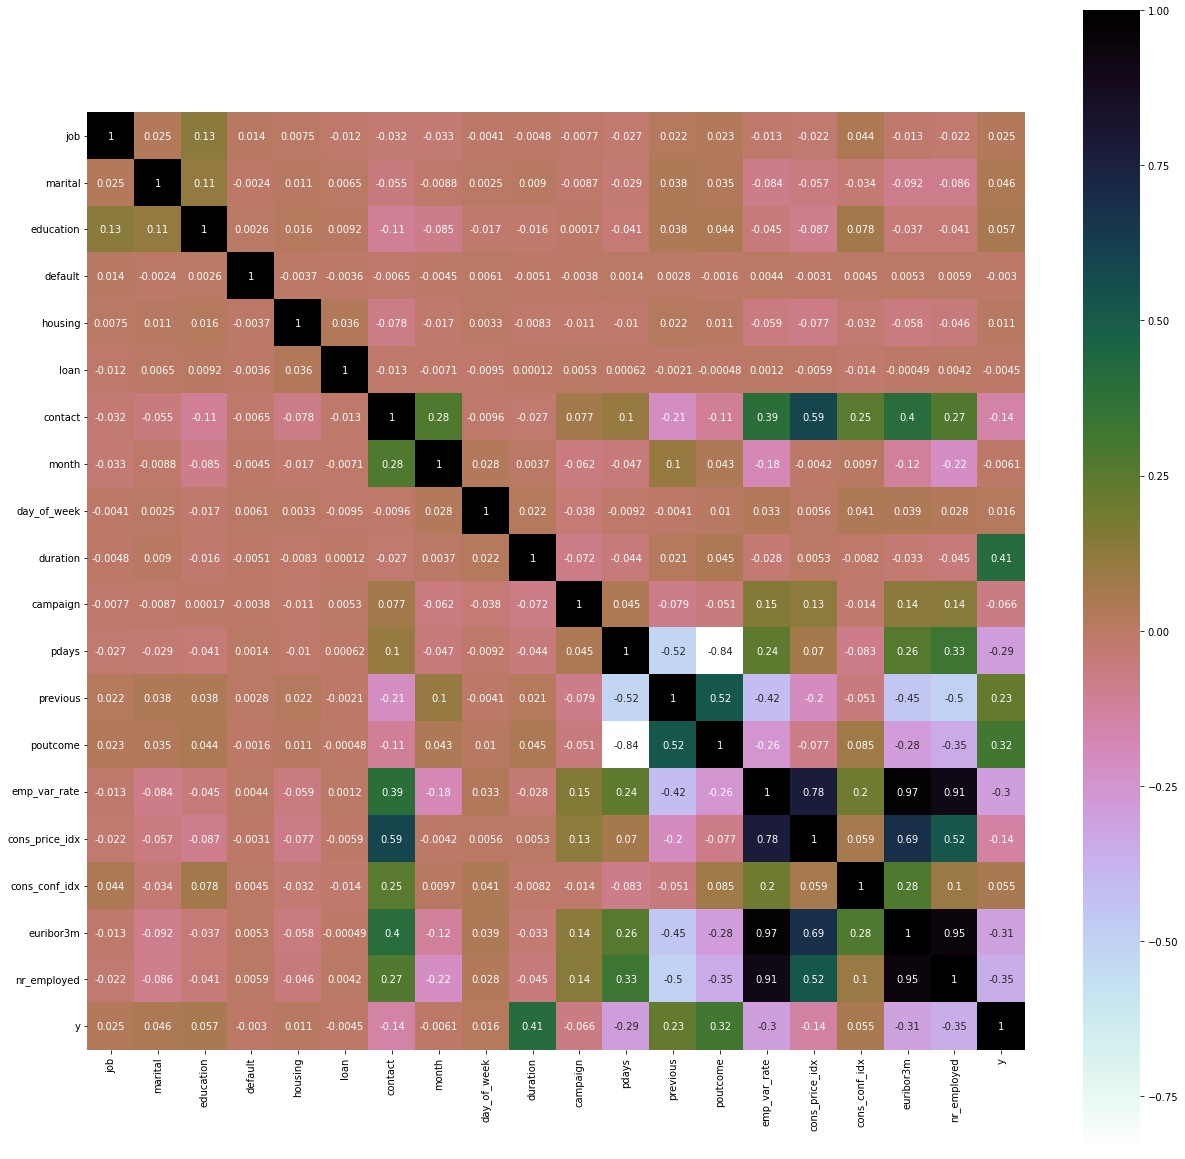

In [123]:
plt.figure(figsize=(21,21))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [124]:
x = pb.drop(['y'], axis=1)
y = pb['y']

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 1)


In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score


In [130]:
acc = model.score(x_test, y_test)
print(acc)

0.9080314654753812


In [132]:
from sklearn.metrics import confusion_matrix


In [133]:
print(confusion_matrix(y_test, y_pred))

[[8867  247]
 [ 700  483]]


In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9114
           1       0.66      0.41      0.50      1183

    accuracy                           0.91     10297
   macro avg       0.79      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297

